# Udacity – Writing a Data Scientist Blog Post

**Project Motivation**

This project (Write a Data Science Blog Post) is part of Udacity Data Scientists Nanodegree Program.

I used data from the [**Stack Overflow Developer Survey**](https://survey.stackoverflow.co/) from the years 2022 to 2025 to answer three trend-related questions using **CRISP-DM** Methology.


## 1. Business Understanding

The analysis focuses on how Remote Work developed over time for fulltime Employees from Europa, North America, India and China by answering the following questions:
1. How has remote work evolved over time?
2. Are there differences in compensation levels for remote work?
3. Is remote work more common in small or large companies? 


## 2. Data Understanding


Set up modules and paths

In [1]:
# load modules
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math


# set up paths
DATA_DIR = Path("data/stack_overflow") 

CURRENT_DIR = os.getcwd()
print(CURRENT_DIR)

SO_DATA = os.path.abspath(os.path.join(CURRENT_DIR, "data", "stack_overflow"))
print(SO_DATA)

DATA_PTH = os.path.abspath(os.path.join(CURRENT_DIR, "data"))

/Users/eisenbro/Library/CloudStorage/OneDrive-VolkswagenAG/Eigene Dateien/python/udacity_blogpost
/Users/eisenbro/Library/CloudStorage/OneDrive-VolkswagenAG/Eigene Dateien/python/udacity_blogpost/data/stack_overflow


**Load all necessary files from folder**

Yearly Stack Overflow Survey Data (Survey Results and Schema) downloaded from: <https://survey.stackoverflow.co/>. 

To get the specific year of survey data, I set up a prefix to the file name regarding the acutal year of the survey.  
This information is used to populate the created column "SurveyYear".  

The function below loads all the files, creates this column "SurveyYear" and concatenates all years of survey data into one dataframe.





In [2]:
def load_all_csv(pfad=str, endswith_str=str, header=int):
    """
    Loads all Files of Stack-Overflow Survey from years 2022 to 2025 into one dataframe.
    Creates new column "SurveyYear" from year info in filename.

    INPUT:      
        pfad:       str         path to all csv files of SO-Survey
        endswith:   str         string to identify which files to load
        header:     int         no of row to use as header 
    
    OUTPUT:
        gesamt_df   dataframe   concatenated dataframe of all surveys incl. year info

    EXAMPLE:
        df_all = load_all_csv(pfad=SOURCE_FILE_PTH, endswith_str="public.csv", header=0)

        Loads all csv files ending with public.csv, 
        creates column 'SurveyYear',
        concatenates them to one large dataframe.

    """
    
    files = [f for f in os.listdir(pfad) if f.endswith(endswith_str)]
    dataframes = []
    for file in files:
        src_path = os.path.join(pfad, file)
        df = pd.read_csv(src_path, header=header, low_memory=False)
        df['SurveyYear'] = file[:4]
        dataframes.append(df)
        print(f"loading {src_path} ...")
    gesamt_df = pd.concat(dataframes, ignore_index=True)
    print('done.')
    return gesamt_df

df_all = load_all_csv(pfad=SO_DATA, endswith_str="public.csv", header=0)

loading /Users/eisenbro/Library/CloudStorage/OneDrive-VolkswagenAG/Eigene Dateien/python/udacity_blogpost/data/stack_overflow/2023_survey_results_public.csv ...
loading /Users/eisenbro/Library/CloudStorage/OneDrive-VolkswagenAG/Eigene Dateien/python/udacity_blogpost/data/stack_overflow/2024_survey_results_public.csv ...
loading /Users/eisenbro/Library/CloudStorage/OneDrive-VolkswagenAG/Eigene Dateien/python/udacity_blogpost/data/stack_overflow/2025_survey_results_public.csv ...
loading /Users/eisenbro/Library/CloudStorage/OneDrive-VolkswagenAG/Eigene Dateien/python/udacity_blogpost/data/stack_overflow/2022_survey_results_public.csv ...
done.


Just keep relevant columns

In [44]:
df_all.to_csv("df_all.csv")

In [3]:
cols_to_keep = ['SurveyYear', 'ResponseId', 'Country', 'ConvertedCompYearly', 'Employment', 'OrgSize', 'RemoteWork']
df = df_all[cols_to_keep]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277012 entries, 0 to 277011
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SurveyYear           277012 non-null  object 
 1   ResponseId           277012 non-null  int64  
 2   Country              254076 non-null  object 
 3   ConvertedCompYearly  133453 non-null  float64
 4   Employment           273321 non-null  object 
 5   OrgSize              197706 non-null  object 
 6   RemoteWork           221321 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 14.8+ MB


Short overview of survey data:

In [45]:
df.to_csv("df.csv")

In [4]:
df.groupby('SurveyYear').count()


,ResponseId,Country,ConvertedCompYearly,Employment,OrgSize,RemoteWork
SurveyYear,,,,,,
2022,73268,71771,38071,71709,51039,58958
2023,89184,87973,48019,87898,65043,73810
2024,65437,58930,23435,65437,47480,54806
2025,49123,35402,23928,48277,34144,33747


We see that Salary (ConvertedCompYearly) does have many NaNs which we must later dicide what to do...

## 3. Data Preparation



### 3.1. Filter on Fulltime Employees only

In [5]:
# filter full-time employees only
print(df.groupby('Employment')['SurveyYear'].value_counts().reset_index())

# 'Employed, full-time' : 2022 to 2024
# 'Employed'            : 2025

df = df[df['Employment'].isin(['Employed, full-time', 'Employed'])]
df.info()

                                            Employment SurveyYear  count
0                                             Employed       2025  33709
1                                  Employed, full-time       2023  53748
2                                  Employed, full-time       2022  42962
3                                  Employed, full-time       2024  39041
4              Employed, full-time;Employed, part-time       2022    228
..                                                 ...        ...    ...
320  Student, part-time;Not employed, but looking f...       2022      3
321  Student, part-time;Not employed, but looking f...       2022      5
322  Student, part-time;Not employed, but looking f...       2022      1
323                         Student, part-time;Retired       2022      4
324                         Student, part-time;Retired       2024      4

[325 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
Index: 169460 entries, 1 to 277010
Data columns (total 7 colum

### 3.2. Filter on Countries which are of interest

We want to focus on North America, Europe, India and China. 
Definition of World-Regions North America and Europe was done according to UN M49 Standard.  
List of unique Country-Names was posted to ChatGPT 5 to obtain an table of Countries and Worldregion according to UN M49 Standard.  


In [6]:
north_america = ['United States', 'Canada', 'Mexico', 'Bermuda', 'United States of America']

europe = [
    "United Kingdom",
    "Netherlands",
    "Sweden",
    "Greece",
    "Poland",
    "Belgium",
    "Germany",
    "Russian Federation",
    "France",
    "Ukraine",
    "Denmark",
    "Romania",
    "Portugal",
    "Italy",
    "Czech Republic",
    "Austria",
    "Spain",
    "Slovakia",
    "Croatia",
    "Norway",
    "Switzerland",
    "Bulgaria",
    "Ireland",
    "Finland",
    "Latvia",
    "Bosnia and Herzegovina",
    "Serbia",
    "Belarus",
    "Lithuania",
    "Estonia",
    "Hungary",
    "Malta",
    "Albania",
    "Slovenia",
    "Iceland",
    "The former Yugoslav Republic of Macedonia",
    "Republic of Moldova",
    "Luxembourg",
    "Montenegro",
    "Andorra",
    "Liechtenstein",
    "Monaco",
    "San Marino",
    "Isle of Man",
    "Kosovo",
    "Moldavia",
    "Slovak Republic",
    "Macedonia",
    "Aland Islands",
    "United Kingdom of Great Britain and Northern Ireland",
    "Republic of North Macedonia",
    "Moldova"
]


# create new column Region
conditions = [
    df['Country'].isin(europe),
    df['Country'].isin(north_america),
    df['Country'].isin(['India']),
    df['Country'].isin(['China'])
]
choices = ['Europe', 'North America', 'India', 'China']
df['Region'] = np.select(conditions, choices, default='Other')

# filter on Regions Europe and North America
df = df[df['Region'].isin(['Europe', 'North America', 'India', 'China'])]
df.info()



<class 'pandas.core.frame.DataFrame'>
Index: 127354 entries, 1 to 277010
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SurveyYear           127354 non-null  object 
 1   ResponseId           127354 non-null  int64  
 2   Country              127354 non-null  object 
 3   ConvertedCompYearly  88639 non-null   float64
 4   Employment           127354 non-null  object 
 5   OrgSize              122997 non-null  object 
 6   RemoteWork           127152 non-null  object 
 7   Region               127354 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 8.7+ MB


In [7]:
df['Region'].value_counts()

Region
Europe           72226
North America    42734
India            11322
China             1072
Name: count, dtype: int64

### 3.3. Prepare Remote-Work

In [8]:
df['RemoteWork'].value_counts()

RemoteWork
Hybrid (some remote, some in-person)                                            49069
Remote                                                                          33337
In-person                                                                       15602
Fully remote                                                                    13746
Full in-person                                                                   4550
Hybrid (some remote, leans heavy to in-person)                                   4388
Hybrid (some in-person, leans heavy to flexibility)                              3797
Your choice (very flexible, you can come in when you want or just as needed)     2663
Name: count, dtype: int64

In [9]:
df['RemoteWork'].isna().sum()

np.int64(202)

Only 202 NaNs -> we can simply drop those rows without any implications

In [10]:
df.dropna(axis=0, subset=['RemoteWork'], inplace=True)

In [11]:
df['RemoteWork'].isna().sum()

np.int64(0)

Mapping different entries to three clusters of Remote Work Type

In [12]:
remote = [
    'Remote',
    'Fully remote'
]
hybrid = [
    'Hybrid (some remote, some in-person)',
    'Hybrid (some remote, leans heavy to in-person)',
    'Hybrid (some in-person, leans heavy to flexibility)',
    'Your choice (very flexible, you can come in when you want or just as needed)'
]
inperson = [
    'In-person',
    'Full in-person'
]

conditions = [
    df['RemoteWork'].isin(remote),
    df['RemoteWork'].isin(hybrid),
    df['RemoteWork'].isin(inperson)
]
choices = ['Remote', 'Hybrid', 'In-person']
df['WorkType'] = np.select(conditions, choices, default='Other')
df['WorkType'].head()

1    Remote
2    Hybrid
3    Hybrid
5    Remote
6    Remote
Name: WorkType, dtype: object

In [13]:
df['WorkType'].value_counts()

WorkType
Hybrid       59917
Remote       47083
In-person    20152
Name: count, dtype: int64

### 3.4. Prepare ConvertedCompYearly

In [14]:
df['ConvertedCompYearly'].isna().sum()

np.int64(38586)

In [15]:
print(np.sum(df['ConvertedCompYearly'].isna()) / df.shape[0]) 

0.3034635711589279


we have many NaN-Values, >30%. How to deal with it? Since we want to include this in the analyis, we drop those rows and focus on the remainder.  
Analyis has shown, that there is no big impact on overall result if dropping NaNs.

In [16]:
df = df.dropna(axis=0, subset='ConvertedCompYearly')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88566 entries, 1 to 276865
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SurveyYear           88566 non-null  object 
 1   ResponseId           88566 non-null  int64  
 2   Country              88566 non-null  object 
 3   ConvertedCompYearly  88566 non-null  float64
 4   Employment           88566 non-null  object 
 5   OrgSize              88501 non-null  object 
 6   RemoteWork           88566 non-null  object 
 7   Region               88566 non-null  object 
 8   WorkType             88566 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 6.8+ MB


In [17]:
df.groupby('SurveyYear').count()

,ResponseId,Country,ConvertedCompYearly,Employment,OrgSize,RemoteWork,Region,WorkType
SurveyYear,,,,,,,,
2022,25323,25323,25323,25323,25305,25323,25323,25323
2023,32667,32667,32667,32667,32642,32667,32667,32667
2024,14504,14504,14504,14504,14492,14504,14504,14504
2025,16072,16072,16072,16072,16062,16072,16072,16072


### 3.5. Prepare Organisation Size

Setup the folling Cluster according to structure OrgSize and create new Column "CompanySize":  

| Cluster | Range |
| ----------- | ----------- |
| Freelance | 1 |
| Micro | 2-9 |
| Small | 10-99 |
| Mid | 100-499 |
| Large | 500-4.999 |
| Very Large | 5.000-9.999 |
| Mega | >= 10.000 |


In [18]:
df['OrgSize'].isna().sum()

np.int64(65)

Only few NaNs, so simply drop them

In [19]:
df = df.dropna(axis=0, subset='OrgSize')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88501 entries, 1 to 276865
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SurveyYear           88501 non-null  object 
 1   ResponseId           88501 non-null  int64  
 2   Country              88501 non-null  object 
 3   ConvertedCompYearly  88501 non-null  float64
 4   Employment           88501 non-null  object 
 5   OrgSize              88501 non-null  object 
 6   RemoteWork           88501 non-null  object 
 7   Region               88501 non-null  object 
 8   WorkType             88501 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 6.8+ MB


In [20]:
df['OrgSize'].value_counts()

OrgSize
20 to 99 employees                                    18632
100 to 499 employees                                  18488
10,000 or more employees                              14188
1,000 to 4,999 employees                              12022
500 to 999 employees                                   7092
10 to 19 employees                                     5424
2 to 9 employees                                       4741
5,000 to 9,999 employees                               4384
Less than 20 employees                                 2171
I don’t know                                           1139
Just me - I am a freelancer, sole proprietor, etc.      220
Name: count, dtype: int64

Clustering different entries of OrgSize in new Columns CompanySize:

In [21]:
micro = [
    '2 to 9 employees'    
]
small = [
    '10 to 19 employees',
    '20 to 99 employees',
    'Less than 20 employees'
]
mid = [
    '100 to 499 employees'
]
large = [
    '500 to 999 employees',
    '1,000 to 4,999 employees'
]
very_large = [
    '5,000 to 9,999 employees'
]
mega = [
    '10,000 or more employees'
]
freelance = [
    'Just me - I am a freelancer, sole proprietor, etc.'
]
conditions = [
    df['OrgSize'].isin(freelance),
    df['OrgSize'].isin(micro),
    df['OrgSize'].isin(small),
    df['OrgSize'].isin(mid),
    df['OrgSize'].isin(large),
    df['OrgSize'].isin(very_large),
    df['OrgSize'].isin(mega)
]
choices = ['Freelance', 'Micro', 'Small', 'Mid', 'Large', 'VeryLarge', 'Mega']
df['CompanySize'] = np.select(conditions, choices, default='Unknown')
df['CompanySize'].head()


1        Micro
2    VeryLarge
3          Mid
5          Mid
6        Large
Name: CompanySize, dtype: object

In [22]:
df.groupby('SurveyYear').count()

,ResponseId,Country,ConvertedCompYearly,Employment,OrgSize,RemoteWork,Region,WorkType,CompanySize
SurveyYear,,,,,,,,,
2022,25305,25305,25305,25305,25305,25305,25305,25305,25305
2023,32642,32642,32642,32642,32642,32642,32642,32642,32642
2024,14492,14492,14492,14492,14492,14492,14492,14492,14492
2025,16062,16062,16062,16062,16062,16062,16062,16062,16062


## 4. Modeling / Analysis

### 4.1 How has remote work evolved over time?

Um diese Frage zu beantworten, haben wir die über die Jahre verschiedenen Einträge bzw. Kategorien zum Thema RemoteWork in drei Cluster eingeteilt:
- **Remote:** Alle Einträge, die ein ausschließliches Remote-Arbeiten bedeuten.
- **Hybrid:** Alle Einträge, die einen Mix aus In-Person und Remote auch in unterschiedlichen Anteilen bedeuten.
- **In-Person:** Alle Einträge, die ein ausschließliches In-Person-Arbeiten bedeuten.

Diese drei Kategorien wurden in einer neuen Spalte "WorkType" gespeichert und ausgewertet.

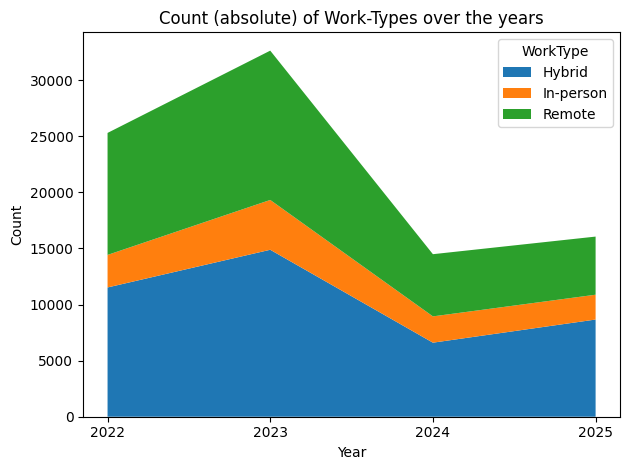

In [28]:
# Count entries per WorkType per Year
counts = df.groupby(['SurveyYear', 'WorkType']).size().unstack(fill_value=0)

# create stackplot
years = counts.index
worktypes = counts.columns
values = [counts[wt].values for wt in worktypes]

plt.stackplot(years, values, labels=worktypes)
plt.title('Count (absolute) of Work-Types over the years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='WorkType')
plt.tight_layout()
plt.show()




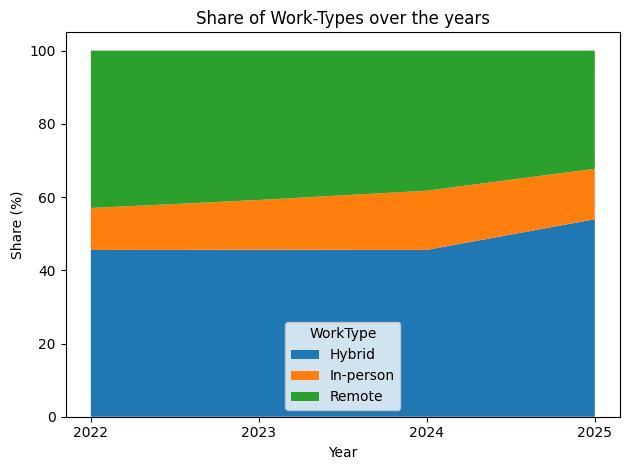

In [29]:

# Count entries per WorkType per Year
counts = df.groupby(['SurveyYear', 'WorkType']).size().unstack(fill_value=0)

# Calculate percentage shares of Work-Type per year
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# create stackplot with share not absolute values
years = percentages.index
worktypes = percentages.columns
values = [percentages[wt].values for wt in worktypes]

plt.stackplot(years, values, labels=worktypes)
plt.title('Share of Work-Types over the years')
plt.xlabel('Year')
plt.ylabel('Share (%)')
plt.legend(title='WorkType')
plt.tight_layout()
plt.show()


For all Regions combined, Remote-Work declined while In-person seems relative stable, Hybrid-shows increase from 2024 to 2025.

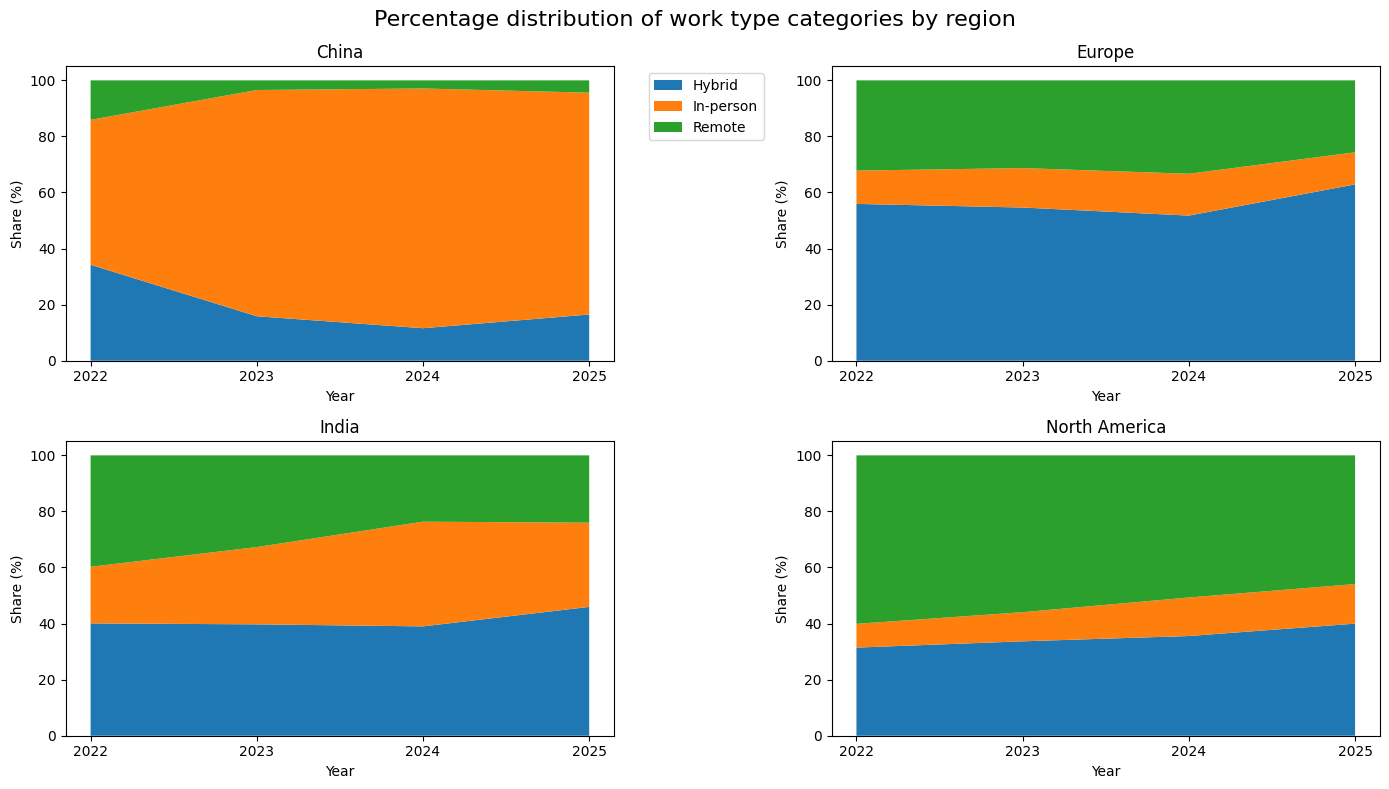

In [31]:
# Stackplots for Percentage distribution of work type categories by region

# Count the number of responses per combination
df_grouped = df.groupby(['Region', 'SurveyYear', 'WorkType']).size().reset_index(name='Count')

# calculate share
df_grouped['Total'] = df_grouped.groupby(['Region', 'SurveyYear'])['Count'].transform('sum')
df_grouped['Percent'] = df_grouped['Count'] / df_grouped['Total'] * 100

# get all regions
regions = df_grouped['Region'].unique()
n_regions = len(regions)

# setup layout for subplots
cols = 2
rows = math.ceil(n_regions / cols)

fig, axes = plt.subplots(rows, cols, figsize=(14, rows * 4), sharex=False, sharey=False)
axes = axes.flatten()

# draw subplot for each region
for i, region in enumerate(regions):
    ax = axes[i]
    df_region = df_grouped[df_grouped['Region'] == region]
    pivot = df_region.pivot(index='SurveyYear', columns='WorkType', values='Percent').fillna(0)

    years = pivot.index
    categories = pivot.columns
    values = pivot.T.values

    ax.stackplot(years, values, labels=categories)
    ax.set_title(region)
    ax.set_xlabel('Year')
    ax.set_ylabel('Share (%)')
    if i == 0: 
        ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

# hide empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle('Percentage distribution of work type categories by region', fontsize=16)
plt.tight_layout()
plt.show()


China has the lowest share of remote work and the highest share of in-person work compared to other regions, followed by India. While Europe has a smaller proportion of remote work than North America, its in-person share has remained relatively stable. In contrast, North America has seen a slight increase in in-person work over the years, with remote work gradually declining in favor of in-person and especially hybrid models. The particularly high in-person share in China is likely influenced by cultural factors.

### 4.2 Are there differences in compensation levels for remote work?

For analysis of Differences in Salary in respect of WorkType, I used the median-values of ConvertedCompYearly.

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88501 entries, 1 to 276865
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SurveyYear           88501 non-null  object 
 1   ResponseId           88501 non-null  int64  
 2   Country              88501 non-null  object 
 3   ConvertedCompYearly  88501 non-null  float64
 4   Employment           88501 non-null  object 
 5   OrgSize              88501 non-null  object 
 6   RemoteWork           88501 non-null  object 
 7   Region               88501 non-null  object 
 8   WorkType             88501 non-null  object 
 9   CompanySize          88501 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 7.4+ MB


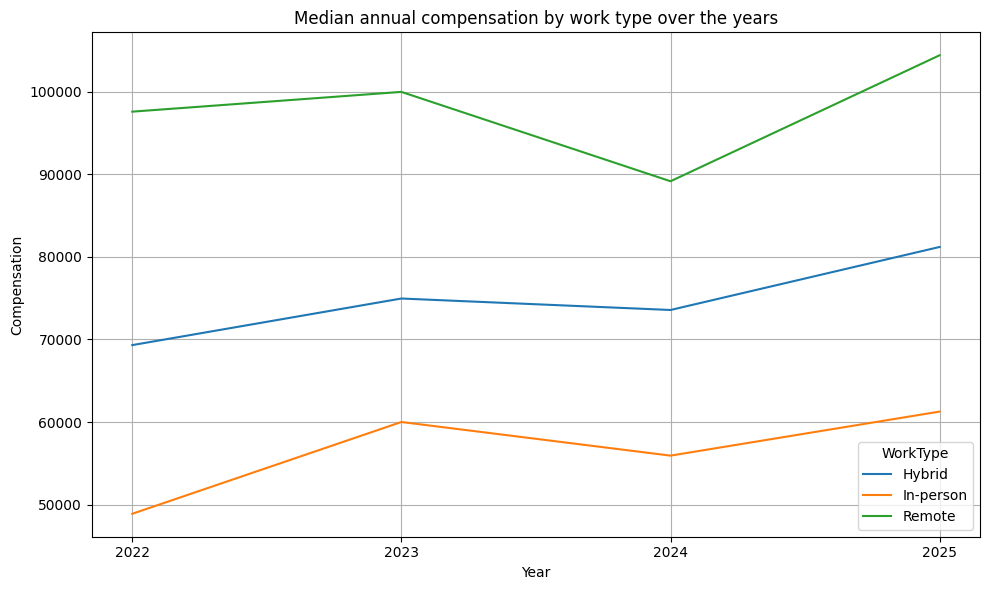

In [32]:
# Group by Year, WorkType and calculate median Salary
grouped = df.groupby(["SurveyYear", "WorkType"])["ConvertedCompYearly"].median().reset_index()


plt.figure(figsize=(10, 6))

# draw a line for each WorkType
for work_type in grouped["WorkType"].unique():
    data = grouped[grouped["WorkType"] == work_type]
    plt.plot(data["SurveyYear"], data["ConvertedCompYearly"], label=work_type)

# show chart
plt.title("Median annual compensation by work type over the years")
plt.xlabel("Year")
plt.ylabel("Compensation")
plt.legend(title="WorkType")
plt.grid(True)
plt.tight_layout()

# Diagramm anzeigen
plt.show()


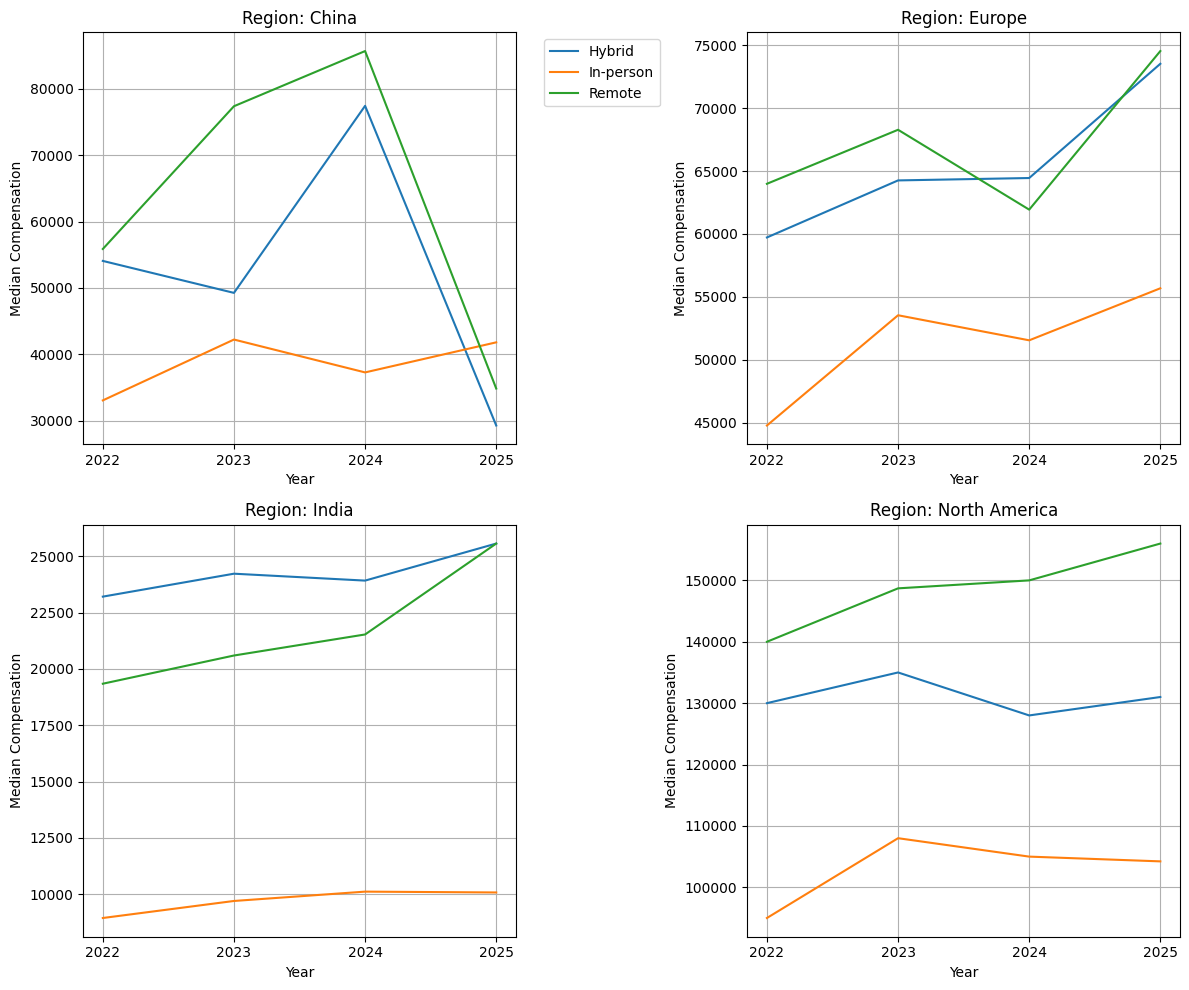

In [36]:

# Group by Year, WorkType and calculate median Salary
grouped = df.groupby(["Region", "SurveyYear", "WorkType"])["ConvertedCompYearly"].median().reset_index()

# get list of regions
regions = grouped["Region"].unique()
num_regions = len(regions)

# setup layout in 2 columns
cols = 2
rows = math.ceil(num_regions / cols)

# create subplots
fig, axes = plt.subplots(rows, cols, figsize=(12, 5 * rows), sharex=False)
axes = axes.flatten()

# draw chart for each region
for i, region in enumerate(regions):
    ax = axes[i]
    data = grouped[grouped["Region"] == region]
    for work_type in data["WorkType"].unique():
        wt_data = data[data["WorkType"] == work_type]
        ax.plot(wt_data["SurveyYear"], wt_data["ConvertedCompYearly"], label=work_type)
    ax.set_title(f"Region: {region}")
    ax.set_ylabel("Median Compensation")
    ax.set_xlabel("Year")
    #ax.legend(title="WorkType")
    ax.grid(True)
    if i == 0:  
        ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

# hide emtpy subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In every Region, Remote & Hybrid Salary is much higher than In-Person Salary. Especially in India, where also Hybrid is better paid as Remote. In all the other regions, Remote is better paid then Hybrid.

### 4.3 Is remote work more common in small or large companies? 

Um diese Frage zu beantworten müssen wir die Informationen zur Unternehmensgröße ermitteln. Diese Information ist im Datenfeld "OrgSize" gespeichert und zwar durch Einträge, die verschiedene Unternehmensgrößen beschreiben, wie z.b. "10 to 19 employees" oder "100 to 499 employees", etc. 
Damit eine Einordnung der größe besser Möglich ist, habe ich die so beschriebenen Unternehmensgrößen in einzelne Cluster nach folgendem Schema unterteilt:

| Cluster | Range |
| ----------- | ----------- |
| Freelance | 1 |
| Micro | 2-9 |
| Small | 10-99 |
| Mid | 100-499 |
| Large | 500-4.999 |
| Very Large | 5.000-9.999 |
| Mega | >= 10.000 |

Diese Cluster wurden in die Spalte "CompanySize" überführt, so dass eine Auswertung nach Unternehmensgröße besser möglich ist.


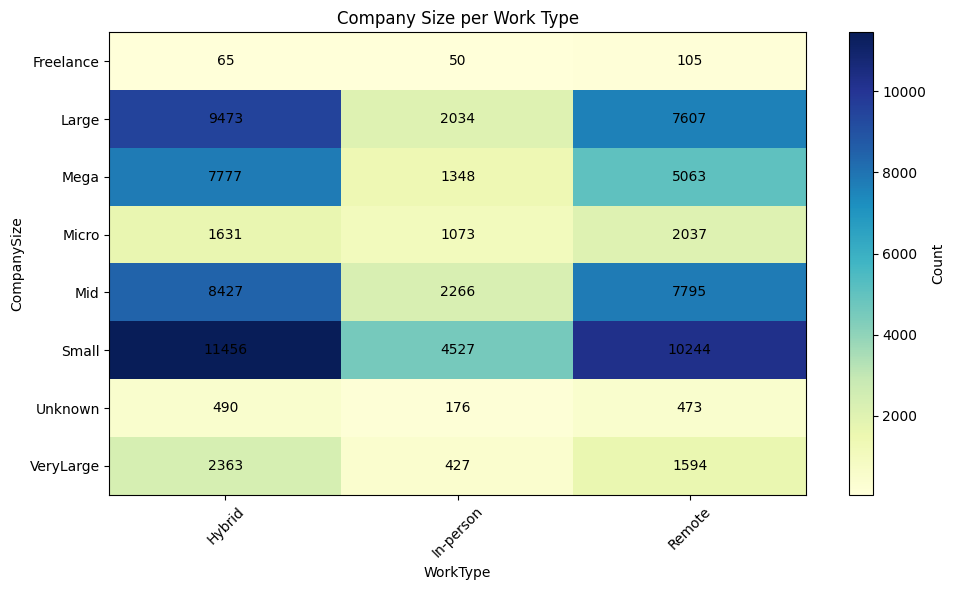

In [38]:
# Create a cross-tabulation: count of occurrences per combination
heatmap_data = pd.crosstab(df["CompanySize"], df["WorkType"])

# create heatmap
plt.figure(figsize=(10, 6))
plt.imshow(heatmap_data, cmap="YlGnBu", aspect="auto")

# labels
plt.xticks(ticks=range(len(heatmap_data.columns)), labels=heatmap_data.columns, rotation=45)
plt.yticks(ticks=range(len(heatmap_data.index)), labels=heatmap_data.index)

# show values in cells
for i in range(len(heatmap_data.index)):
    for j in range(len(heatmap_data.columns)):
        value = heatmap_data.iloc[i, j]
        plt.text(j, i, str(value), ha="center", va="center", color="black")

# format
plt.title("Company Size per Work Type")
plt.xlabel("WorkType")
plt.ylabel("CompanySize")
plt.colorbar(label="Count")

plt.tight_layout()
plt.show()

=> Hier evtl. Normalisieren, denn Small und Large kommen im Datensatz am Häufigsten vor, darum sind auch die Häufigkeiten von Remote usw. hoch!

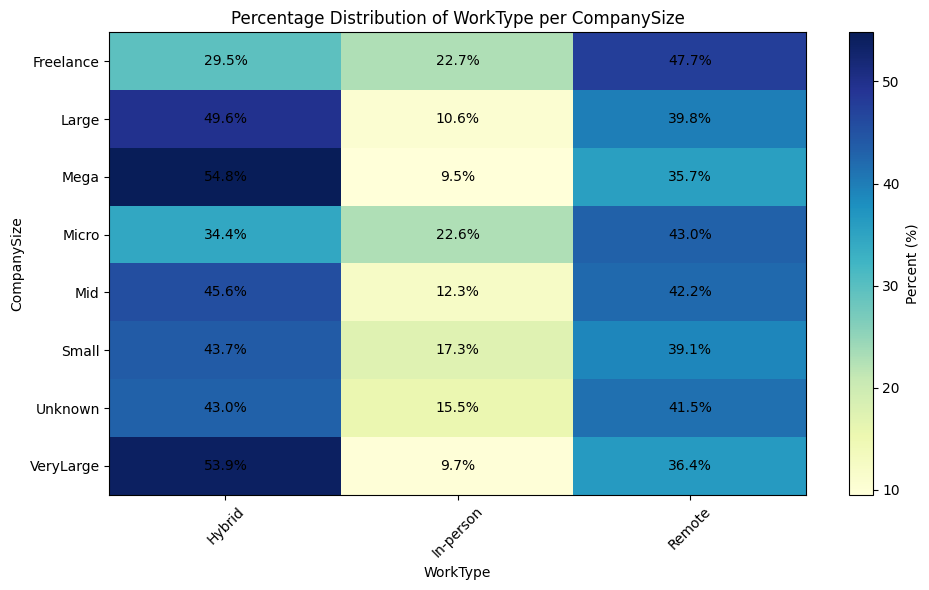

In [39]:

# Create a cross-tabulation: count of occurrences per combination
heatmap_data = pd.crosstab(df["CompanySize"], df["WorkType"])

# Calculate the percentage frequency within each company size group
heatmap_percent = heatmap_data.div(heatmap_data.sum(axis=1), axis=0) * 100

# create heatmap
plt.figure(figsize=(10, 6))
plt.imshow(heatmap_percent, cmap="YlGnBu", aspect="auto")

# labels
plt.xticks(ticks=range(len(heatmap_percent.columns)), labels=heatmap_percent.columns, rotation=45)
plt.yticks(ticks=range(len(heatmap_percent.index)), labels=heatmap_percent.index)

# show percentage values
for i in range(len(heatmap_percent.index)):
    for j in range(len(heatmap_percent.columns)):
        value = heatmap_percent.iloc[i, j]
        plt.text(j, i, f"{value:.1f}%", ha="center", va="center", color="black")

# formal
plt.title("Percentage Distribution of WorkType per CompanySize")
plt.xlabel("WorkType")
plt.ylabel("CompanySize")
plt.colorbar(label="Percent (%)")

plt.tight_layout()
plt.show()

=> Stackplot mit WorkType als Flächen und CompanySizes als Dimensionen, aber in der richtigen Reihenfolge!  
=> Mega im Zeitverlauf darstellen, weil ich ja auch in Mega arbeite...

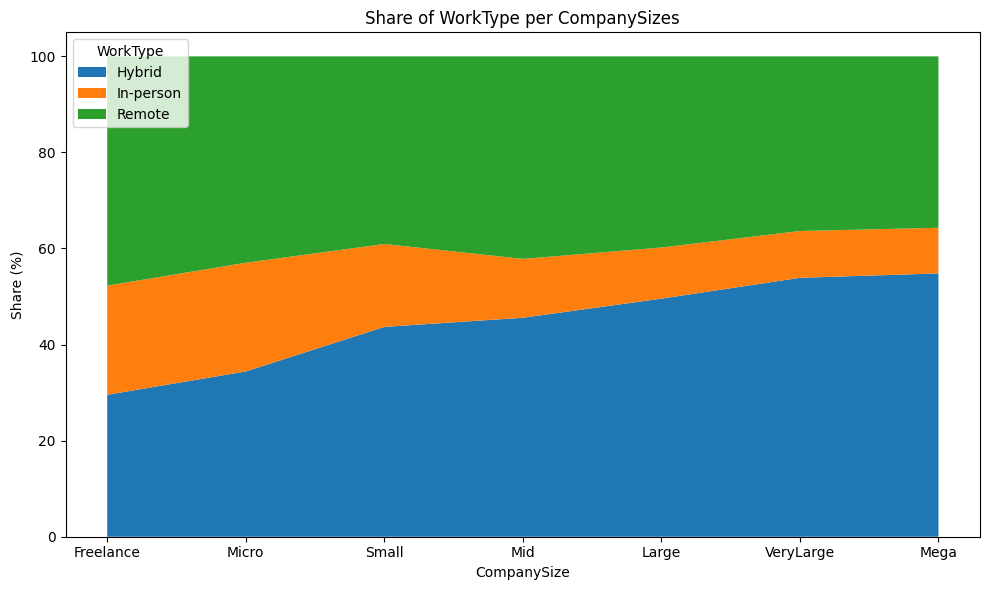

In [40]:

# manually defined order of CompanySize
company_order = ["Freelance", "Micro", "Small", "Mid", "Large", "VeryLarge", "Mega"]

# count entries per WorkType per CompanySize
counts = df.groupby(['CompanySize', 'WorkType']).size().unstack(fill_value=0)

# use pre-ordered CompanySize-List
counts = counts.loc[company_order]

# calculate percentage share
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# create stackplot
company_sizes = percentages.index
worktypes = percentages.columns
values = [percentages[wt].values for wt in worktypes]

plt.figure(figsize=(10, 6))
plt.stackplot(company_sizes, values, labels=worktypes)
plt.title('Share of WorkType per CompanySizes')
plt.xlabel('CompanySize')
plt.ylabel('Share (%)')
plt.legend(title='WorkType', loc='upper left')
plt.tight_layout()
plt.show()

The larger the company, the more hybrid work and the less in-person work—but also less fully remote work.

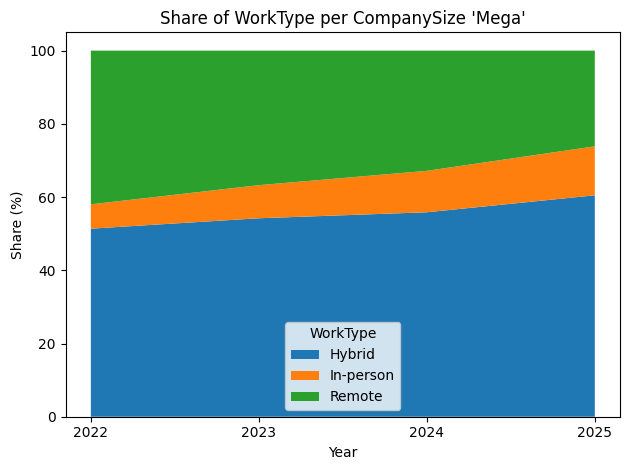

In [41]:
# Count Entries per WorkType and Year
df_ = df[df['CompanySize'] == 'Mega']
counts = df_.groupby(['SurveyYear', 'WorkType']).size().unstack(fill_value=0)

# Berechne die prozentualen Anteile pro Jahr
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# Erstelle den Stackplot mit prozentualen Anteilen
years = percentages.index
worktypes = percentages.columns
values = [percentages[wt].values for wt in worktypes]

plt.stackplot(years, values, labels=worktypes)
plt.title("Share of WorkType per CompanySize 'Mega'")
plt.xlabel('Year')
plt.ylabel('Share (%)')
plt.legend(title='WorkType')
plt.tight_layout()
plt.show()

Für die CompanySize 'Mega' zeigt sich, dass über die Jahre der Anteil reines Remote-Arbeiten immer geringer wird und eher Hybrides Arbeiten aber v.a. auch wieder In-Person-Arbeiten bevorzugt wird.  

Und wie sieht das für diese Unternehmensgröße in den einzelnen Regionen aus?

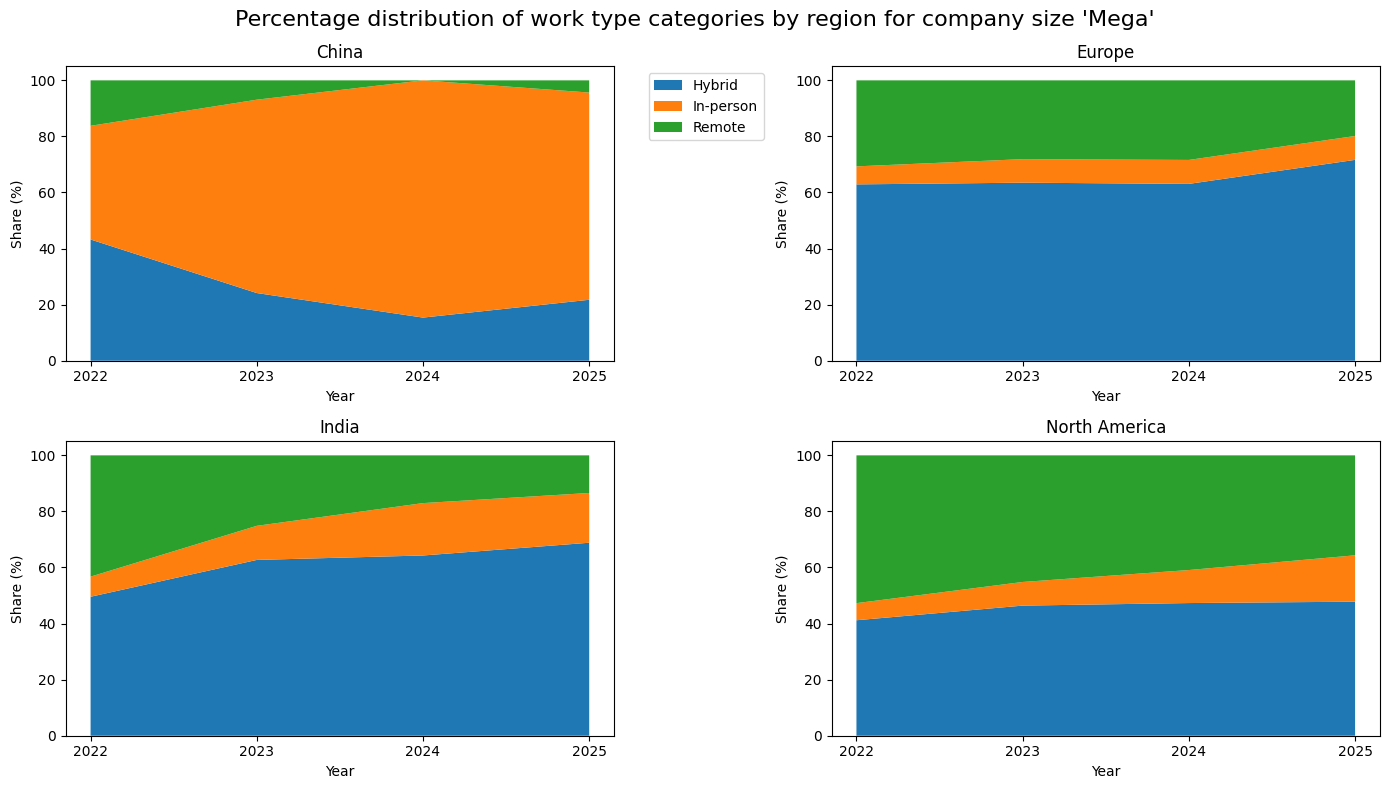

In [43]:
# Count Entries per WorkType, Region and Year for CompanySize 'Mega'
df_ = df[df['CompanySize'] == 'Mega']
df_grouped = df_.groupby(['Region', 'SurveyYear', 'WorkType']).size().reset_index(name='Count')

# calculate percentage share
df_grouped['Total'] = df_grouped.groupby(['Region', 'SurveyYear'])['Count'].transform('sum')
df_grouped['Percent'] = df_grouped['Count'] / df_grouped['Total'] * 100

# get all regions
regions = df_grouped['Region'].unique()
n_regions = len(regions)

# setup layout
cols = 2
rows = math.ceil(n_regions / cols)

fig, axes = plt.subplots(rows, cols, figsize=(14, rows * 4), sharex=False, sharey=False)
axes = axes.flatten()

# draw plot for each region
for i, region in enumerate(regions):
    ax = axes[i]
    df_region = df_grouped[df_grouped['Region'] == region]
    pivot = df_region.pivot(index='SurveyYear', columns='WorkType', values='Percent').fillna(0)

    years = pivot.index
    categories = pivot.columns
    values = pivot.T.values

    ax.stackplot(years, values, labels=categories)
    ax.set_title(region)
    ax.set_xlabel('Year')
    ax.set_ylabel('Share (%)')
    if i == 0:  # Legende nur einmal anzeigen
        ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

# hide empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Percentage distribution of work type categories by region for company size 'Mega'" , fontsize=16)
plt.tight_layout()
plt.show()

Across the different regions, the trend clearly shows a shift away from fully remote work, with an increase in both in-person and hybrid work arrangements.


## 5. Evaluation
- Remote work is well established, but hybrid has been the winner in recent years.
- Salaries increase with company size – and remote/hybrid models lead the way.
- Regional differences persist: North America pays the most, India the least.
- Mega-corporations focus on flexibility, while smaller companies prefer remote setups. -> aber auch relativ hoher In-person-Anteil...

## 6. Deployment / Communication
- GitHub-Repo incl. Notebook & README
- [Blogpost](https://medium.com/@roman.eisenbarth/remote-work-in-transition-trends-salaries-and-company-size-2022-2025-d3e82ba88231)